# Chapter 10 – Introduction to Artificial Neural Networks with Keras
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alirezatheh/handson-ml3-notes/blob/main/notebooks/10_introduction_to_artificial_neural_networks_with_keras.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/alirezatheh/handson-ml3-notes/blob/main/notebooks/10_introduction_to_artificial_neural_networks_with_keras.ipynb)

*Artificial neural networks* (ANNs) are machine learning models inspired by the networks of biological neurons found in our brains. Although they have gradually become quite different from their biological cousins.

**Note**: We can get the best of both worlds by being open to biological inspirations without being afraid to create biologically unrealistic models, as long as they work well.

They are everywhere:
- Classifying billions of images (e.g., Google Images)
- Powering speech recognition services (e.g., Apple’s Siri)
- Recommending the best videos to watch to hundreds of millions of users every day (e.g., YouTube)
- Learning to beat the world champion at the game of Go (DeepMind’s AlphaGo)

## From Biological to Artificial Neurons
ANNs were first introduced back in 1943 by the neurophysiologist Warren McCulloch and the mathematician Walter Pitts in their landmark paper [“A Logical Calculus of Ideas Immanent in Nervous Activity”](https://homl.info/43), which they presented a simplified computational model of how biological neurons might work together in animal brains to perform complex computations using *propositional logic*.

After two long winters (1960s, 1980s), we are now witnessing yet another wave of interest in ANNs. Here are a few good reasons to believe that this time is different:
- There is now a huge quantity of data available to train neural networks, and ANNs frequently outperform other ML techniques on very large and complex problems.
- The tremendous increase in computing power since the 1990s now makes it possible to train large neural networks in a reasonable amount of time. This is in part due to Moore’s law (the number of components in integrated circuits has doubled about every 2 years over the last 50 years), but also thanks to the gaming industry, which has stimulated the production of powerful GPU cards by the millions. Moreover, cloud platforms have made this power accessible to everyone.
- The training algorithms have been improved. To be fair they are only slightly different from the ones used in the 1990s, but these relatively small tweaks have had a huge positive impact.
- Some theoretical limitations of ANNs have turned out to be benign in practice. e.g. many people thought that ANN training algorithms were doomed because they were likely to get stuck in local optima, but it turns out that this is not a big problem in practice, especially for larger neural networks: the local optima often perform almost as well as the global optimum.
- ANNs seem to have entered a virtuous circle of funding and progress. Amazing products based on ANNs regularly make the headline news, which pulls more and more attention and funding toward them, resulting in more and more progress and even more amazing products.

### Biological Neurons
Let’s take a quick look at a biological neuron.

<center>
  <img 
    src="../images/10/biological_neuron.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

It is an unusual-looking cell mostly found in animal brains. It’s composed of: 
- A *cell body* containing the nucleus and most of the cell’s complex components
- Many branching extensions called *dendrites*
- Plus one very long extension called the *axon*:
  - The axon’s length may be just a few times longer than the cell body, or up to tens of thousands of times longer. 
  - Near its extremity the axon splits off into many branches called *telodendria*.
    - At the tip of these branches are minuscule structures called *synaptic terminals* (or simply *synapses*), which are connected to the dendrites or cell bodies of other neurons (They are not actually attached, just so close that they can very quickly exchange chemical signals). 
   
Biological neurons produce short electrical impulses called *action potentials* (APs, or just *signals*), which travel along the axons and make the synapses release chemical signals called *neurotransmitters*. When a neuron receives a sufficient amount of these neurotransmitters within a few milliseconds, it fires its own electrical impulses (actually, it depends on the neurotransmitters, as some of them inhibit the neuron from firing). Here is multiple layers in a biological neural network (human cortex):

<center>
  <img 
    src="../images/10/bnn.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

### Logical Computations with Neurons
McCulloch and Pitts proposed a very simple model of the biological neuron (an *artificial neuron*): it has one or more binary (on/off) inputs and one binary output. The artificial neuron activates its output when more than a certain number of its inputs are active. McCulloch and Pitts showed that even with such a simplified model it is possible to build a network of artificial neurons that can compute any logical proposition we want.

Let’s build a few ANNs that perform various logical computations, assuming that a neuron is activated when at least two of its input connections are active:

<center>
  <img 
    src="../images/10/logical_computations_ann.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

### The Perceptron
Invented in 1957 by Frank Rosenblatt based on a slightly different artificial neuron called a *threshold logic unit* (TLU), or sometimes a *linear threshold unit* (LTU). It’s almost like logistic regression, except it uses a *step function* instead of the logistic function.

<center>
  <img 
    src="../images/10/perceptron.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

**Equation 10-1** Common step functions used in perceptrons (assuming threshold = 0)
$$
\text{heviside}(z)=\begin{cases}
0&\text{if}\;z<0
\\1&\text{if}\;z\geq0
\end{cases}
\;\;\;\;\;\;\text{sgn}(z)=\begin{cases}
-1&\text{if}\;z<0
\\0&\text{if}\;z=0
\\+1&\text{if}\;z>0
\end{cases}
$$

A perceptron is composed of one or more TLUs organized in a single layer, where every TLU is connected to every input. Such a layer is called a *fully connected layer*, or a *dense layer*. The inputs constitute the input layer. And since the layer of TLUs produces the final outputs, it is called the *output layer*.

**Equation 10-2** Computing the outputs of a fully connected layer
$$
h_{\mathbf{W},\mathbf{b}}(\mathbf{X}) =\phi(\mathbf{X}\mathbf{W}+\mathbf{b})
$$
- $\mathbf{X}$: The matrix of input features. It has one row per instance and one column per feature.
- $\mathbf{W}$: The weight matrix for connection weights. It has one row per input and one column per neuron.
- $\mathbf{b}$: The bias vector. One per neuron.
- $\mathbf{\phi}$: The *activation function*, when the artificial neurons are TLUs, it is a step function.


The perceptron training algorithm proposed by Rosenblatt was inspired by *Hebb’s rule* (or *Hebbian learning*). In his 1949 book The Organization of Behavior (Wiley), Donald Hebb suggested that when a biological neuron triggers another neuron often, the connection between these two neurons grows stronger. Siegrid Löwel later summarized Hebb’s idea in the catchy phrase, “Cells that fire together, wire together”; The connection weight between two neurons tends to increase when they fire simultaneously. The perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction.

**Equation 10-3** Perceptron learning rule (weight update)
$$
{w_{i,j}}^{(\text{next step})}=w_{i,j}+\eta(y_j-\widehat{y}_j)x_j
$$
- $w_{i,j}$: The connection weight between the $i^\text{th}$ input and the $j^\text{th}$ neuron
- $x_i$: the $i^\text{th}$ input value of the current training instance
- $\widehat{y}_j$: The output of the $j^\text{th}$ output neuron for the current training instance
- $y_j$: The target output of the $j^\text{th}$ output neuron for the current training instance
- $\eta$: The learning rate

The decision boundary of each output neuron is linear, so perceptrons are incapable of learning complex patterns (just like logistic regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a (not unique) solution. This is called the *perceptron convergence theorem*.

Let’s try it on the iris dataset:

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
# Iris setosa
y = iris.target == 0

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
# Predicts True and False for these 2 flowers
y_pred = per_clf.predict(X_new)

In [2]:
y_pred

array([ True, False])

The `Perceptron` is equivalent to a `SGDClassifier` with `loss='perceptron'`, 
no regularization, and a constant learning rate equal to 1:

In [3]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(
    loss='perceptron',
    penalty=None,
    learning_rate='constant',
    eta0=1,
    random_state=42,
)
sgd_clf.fit(X, y)
assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()

In their 1969 monograph *Perceptrons*, Marvin Minsky and Seymour Papert highlighted a number of serious weaknesses of perceptrons, in particular, the fact that they are incapable of solving some trivial problems (e.g., the exclusive OR (XOR) classification problem. This is true of any other linear classification model).

It turns out that some of the limitations of perceptrons can be eliminated by stacking multiple perceptrons. The resulting ANN is called a *multilayer perceptron* (MLP).

<center>
  <img 
    src="../images/10/xor_ann.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

**Note**: We prefer logistic regression over perceptrons, because perceptrons do not output a class probability. Also they do not use any regularization by default, and training stops as soon as there are no more prediction errors on the training set, so the model typically does not generalize as well as logistic regression or a linear SVM classifier. However, they are a bit faster.

### The Multilayer Perceptron and Backpropagation
An MLP is composed of one input layer, one or more layers of TLUs called *hidden layers*, and one final layer of TLUs called the *output layer*. The layers close to the input layer are usually called the *lower layers*, and the ones close to the outputs are usually called the *upper layers*.

<center>
  <img 
    src="../images/10/mlp.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

When an ANN contains a deep stack of hidden layers, it is called a *deep neural network* (DNN).

In the early 1960s several researchers discussed the possibility of using gradient descent to train neural networks, but they failed.

In 1970, a researcher named Seppo Linnainmaa introduced in his master’s thesis a technique to compute all the gradients of the model’s error with regard to the model parameters automatically and efficiently. This algorithm is now called *reverse-mode automatic differentiation* (or reverse-mode auto‐diff for short). These gradients can then be used to perform a gradient descent step. If we repeat this process of computing the gradients automatically and taking a gradient descent step, the neural network’s error will gradually drop until it eventually reaches a minimum. This combination of reverse-mode autodiff and gradient descent is now called *backpropagation* (or *backprop* for short).

Backprop wasn’t mainstream until in 1985 David Rumelhart, Geoffrey Hinton, and Ronald Williams published [“Learning Internal Representations by Error Propagation”](https://homl.info/44) analyzing how backpropagation allowed neural networks to learn useful internal representations. Today it is the most popular technique.

Let’s see how backprop works in detail:
- It handles one mini-batch at a time (e.g, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an *epoch*.
- Each mini-batch enters the network through the input layer. It then computes the output of all the neurons in the first hidden layer, for every instance in the mini-batch. The result is passed on to the next layer, and so on until we get the output of the last layer, the output layer. This is the *forward pass*: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.
- Next, it measures the network’s output error.
- Then it computes how much each output bias and each connection to the output layer contributed to the error. This is done analytically by applying the *chain rule*, which makes this step fast and precise.
- It then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until it reaches the input layer (propagating the error gradient backward).
- Finally, it performs a gradient descent step to tweak all the connection weights in the network, using the error gradients it just computed.

**Warning**: It is important to initialize all the hidden layers’ connection weights randomly, or else training will fail (*break the symmetry*). e.g., if we initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. In other words, despite having hundreds of neurons per layer, our model will act as if it had only one neuron per layer.

<style>ul {list-style-type: none;}</style>
Rumelhart and his colleagues replaced the step function with the logistic function. This was essential because the step function contains only flat segments, so there is no gradient to work with (gradient descent cannot move on a flat surface), while the sigmoid function has a well-defined nonzero derivative everywhere, allowing gradient descent to make some progress at every step. There is also other activation functions:

*The hyperbolic tangent function:* $\tanh(z)=2\sigma(2z)-1$
- Just like the sigmoid function, this activation function is S-shaped, continuous, and differentiable, but its output value ranges from –1 to 1. That range tends to make each layer’s output more or less centered around 0 at the beginning of training, which often helps speed up convergence.

*The rectified linear unit function:* $\text{ReLU}(z)=\max(0,z)$
- The ReLU function is continuous but unfortunately not differentiable at $z=0$ (the slope changes abruptly, which can make gradient descent bounce around), and its derivative is 0 for $z<0$. In practice, however, it works very well and has the advantage of being fast to compute, so it has become the default. Also, it does not have a max.

*The softplus activation function*: $\text{softplus(z)}=\log(1+\exp(z))$
- is close to 0 when $z$ is negative, and close to $z$ when $z$ is positive.

<a id="activations-figure"></a>
<center>
  <img 
    src="../images/10/activations.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

Why do we need activation functions? If we chain several linear transformations, all we get is a linear transformation. So if we don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer.

### Regression MLPs
**Warning**: Building and training a standard MLP with Scikit-Learn in just a few lines of code is very convenient, but the neural net features are limited. This is why we will switch to Keras in the second part of this chapter.

**Note**: The *Huber loss*, is a combination of MSE and MAE. It is quadratic when the error is smaller than a threshold $\delta$ (typically 1) but linear when the error is larger than $\delta$.

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

In [5]:
rmse

0.5053326657968465

Let’s summarize the typical architecture of a regression MLP in a table:

| Hyperparameter             | Typical value                                                                     |
|----------------------------|-----------------------------------------------------------------------------------|
| # hidden layers            | Depends on the problem, but typically 1 to 5                                      |
| # neurons per hidden layer | Depends on the problem, but typically 10 to 100                                   |
| # output neurons           | 1 per prediction dimension                                                        |
| Hidden activation          | ReLU                                                                              |
| Output activation          | None, or ReLU/softplus (if positive outputs) or sigmoid/tanh (if bounded outputs) |
| Loss function              | MSE, or Huber if outliers                                                         |

### Classification MLPs

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42
)

mlp_clf = MLPClassifier(
    hidden_layer_sizes=[5], max_iter=10_000, random_state=42
)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

Let’s summarize the typical architecture of a classification MLP in a table:

| Hyperparameter          | Binary classification                          | Multilabel binary classification | Multiclass classification |
|-------------------------|------------------------------------------------|----------------------------------|---------------------------|
| # hidden layers         | Typically 1 to 5 layers, depending on the task | Same                             | Same                      |
| # output neurons        | 1                                              | 1 per binary label               | 1 per class               |
| Output layer activation | Sigmoid                                        | Sigmoid                          | Softmax                   |
| Loss function           | X-entropy                                      | X-entropy                        | X-entropy                 |

## Implementing MLPs with Keras
The original Keras library was developed by François Chollet as part of a research project (ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System)) and was released as a standalone open source project in March 2015. Chollet joined Google in 2015, where he continues to lead the Keras project.

### Building an Image Classifier Using the Sequential API
#### Using Keras to load the dataset
Let’s start by loading the fashion MNIST dataset. The dataset is already split for us between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

In [7]:
import keras
import tensorflow as tf

fashion_mnist = keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

The training set contains 60,000 grayscale images, each 28 $\times$ 28 pixels:

In [8]:
X_train.shape

(55000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [9]:
X_train.dtype

dtype('uint8')

Let’s scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [10]:
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

We can plot an image using Matplotlib’s `imshow()` function, with a `'binary'`
 color map:

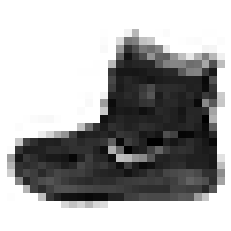

In [11]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [12]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

Here are the corresponding class names:

In [13]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
]

So the first image in the training set is an ankle boot:

In [14]:
class_names[y_train[0]]

'Ankle boot'

Let’s take a look at a sample of the images in the dataset:

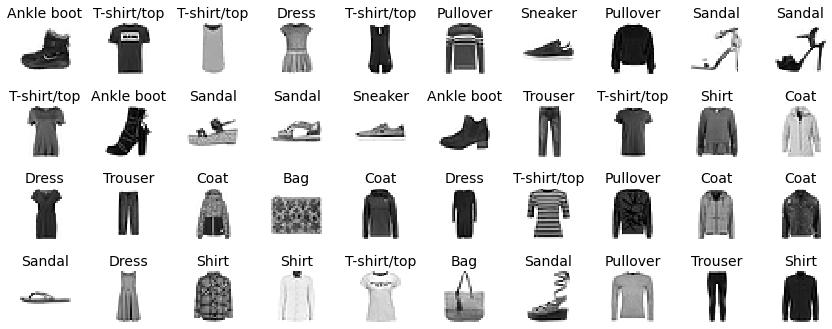

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

#### Creating the model using the Sequential API

In [16]:
tf.random.set_seed(42)
# utils.set_random_seed() function, sets the random seeds for
# TensorFlow, Python (random.seed()), and NumPy (np.random.seed()).
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=[28, 28]))
model.add(keras.layers.Flatten())
# We can also use activation=activations.relu
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

**Tip**: See https://keras.io/api/layers/activations for more activations.

In [17]:
keras.backend.clear_session()
tf.random.set_seed(42)

model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ]
)

**Tip**: All global state managed by Keras is stored in a *Keras session*, which we can clear using `keras.backend.clear_session()`. In particular, this resets the name counters.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Another way to display the model’s architecture:

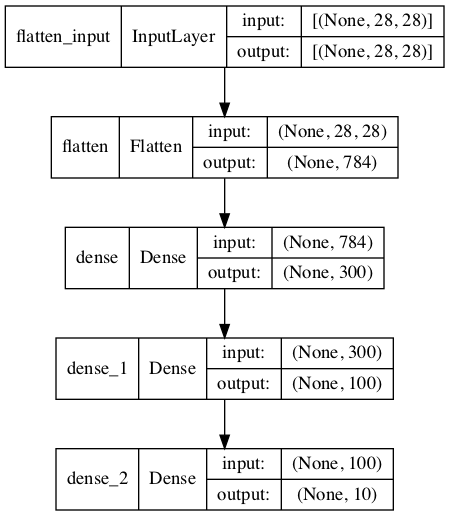

In [19]:
keras.utils.plot_model(model, 'my_fashion_mnist_model.png', show_shapes=True)

In [20]:
model.layers

In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [22]:
model.get_layer('dense') is hidden1

True

In [23]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

**Note**: If we want to use a different initialization method, we can set `kernel_initializer` (*kernel* is another name for the matrix of connection weights) or `bias_initializer` when creating the layer. Full list is at https://keras.io/api/layers/initializers.

**Note**: The shape of the weight matrix depends on the number of inputs, which is why we specified the `input_shape` when creating the model. If we don'n, it’s OK: Keras will simply wait until it knows the input shape before it actually builds the model parameters. This will happen either when we feed it some data (e.g., during training), or when we call its `build()` method. Until then, we will not be able to do certain things, such as display the model summary or save the model. So, if we know the input shape it is best to specify it.

#### Compiling the model

In [27]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'],
)

**Note**: This is equivalent to following cell. For the full lists, see https://keras.io/api/losses, https://keras.io/api/optimizers, and https://keras.io/api/metrics.

In [28]:
model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.SGD(),
    metrics=[keras.metrics.sparse_categorical_accuracy],
)

We use the `'sparse_categorical_crossentropy'` loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g., `[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]` to represent class 3), then we would need to use the `'categorical_crossentropy'` loss instead.

**Tip**: Here is how we can convert class ids to one-hot vectors. It’s important to set `num_classes` when the number of classes is greater than the maximum class id in the sample:

In [29]:
keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
# Shows how to convert one-hot vectors to class ids
np.argmax(
    [
        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    ],
    axis=1,
)

array([0, 5, 1, 0])

**Note**: When using the SGD optimizer, it is important to tune the learning rate. So, we should use `optimizer=keras.optimizers.SGD(learning_rate=__???__)`

#### Training and evaluating the model

In [31]:
history = model.fit(
    X_train, y_train, epochs=30, validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7220 - sparse_categorical_accuracy: 0.7649 - val_loss: 0.4959 - val_sparse_categorical_accuracy: 0.8332
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4825 - sparse_categorical_accuracy: 0.8332 - val_loss: 0.4567 - val_sparse_categorical_accuracy: 0.8384
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4369 - sparse_categorical_accuracy: 0.8480 - val_loss: 0.4228 - val_sparse_categorical_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4122 - sparse_categorical_accuracy: 0.8558 - val_loss: 0.3966 - val_sparse_categorical_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3910 - sparse_categorical_accuracy: 0.8631 - val_loss: 0.3890 - val_sparse_categorical_accuracy: 0.8632
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3751 - spars

**Tip**: Instead of passing a validation set, we could set `validation_split` to the ratio of the training set that we want Keras to use for validation.

If the training set was very skewed, with some classes being overrepresented and others underrepresented, it would be useful to set the `class_weight` argument when calling the `fit()` method, to give a larger weight to underrepresented classes and a lower weight to overrepresented classes. These weights would be used by Keras when computing the loss. If we need per-instance weights, set the `sample_weight` argument. If both `class_weight` and `sample_weight` are provided, then Keras multiplies them. Per-instance weights could be useful, e.g., if some instances were labeled by experts while others were labeled using a crowdsourcing platform: we might want to give more weight to the former. We can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the `validation_data` tuple.

In [32]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [33]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


`history.history` is a dict containing the loss and extra metrics it measured at the end of each epoch. If we use this dict to create a Pandas DataFrame and call its `plot()` method, we get the learning curves:

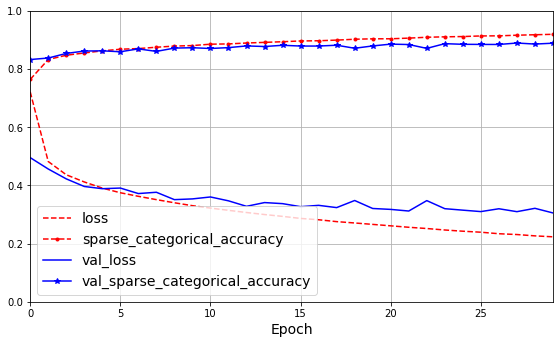

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0, 29],
    ylim=[0, 1],
    grid=True,
    xlabel='Epoch',
    style=['r--', 'r--.', 'b-', 'b-*'],
)
plt.legend(loc='lower left')
plt.show()

The validation error is computed at the *end* of each epoch, while the training error is computed using a *running mean during* each epoch, so the training curve should be shifted by half an epoch to the left:

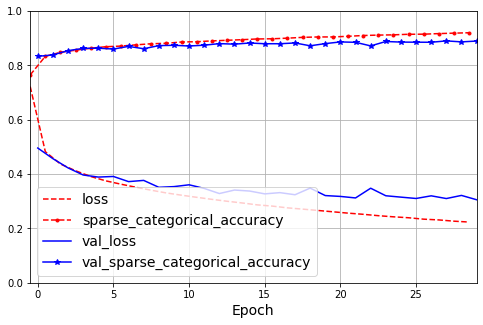

In [35]:
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ['r--', 'r--.', 'b-', 'b-*']):
    epochs = np.array(history.epoch) + (0 if key.startswith('val_') else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel('Epoch')
plt.axis([-0.5, 29, 0.0, 1])
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 867us/step - loss: 0.3243 - sparse_categorical_accuracy: 0.8864


[0.32431697845458984, 0.8863999843597412]

#### Using the model to make predictions

In [37]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [38]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [40]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP Using the Sequential API
Let’s load, split and scale the California housing dataset:

In [41]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

In [42]:
tf.random.set_seed(42)
norm_layer = keras.layers.Normalization(input_shape=X_train.shape[1:])
model = keras.Sequential(
    [
        norm_layer,
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(1),
    ]
)
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError']
)
norm_layer.adapt(X_train)
history = model.fit(
    X_train, y_train, epochs=20, validation_data=(X_valid, y_valid)
)
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9051 - root_mean_squared_error: 0.9514 - val_loss: 0.4030 - val_root_mean_squared_error: 0.6348
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3843 - root_mean_squared_error: 0.6199 - val_loss: 0.8436 - val_root_mean_squared_error: 0.9185
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3609 - root_mean_squared_error: 0.6007 - val_loss: 0.3744 - val_root_mean_squared_error: 0.6119
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3416 - root_mean_squared_error: 0.5844 - val_loss: 0.4343 - val_root_mean_squared_error: 0.6590
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3301 - root_mean_squared_error: 0.5746 - val_loss: 0.3085 - val_root_mean_squared_error: 0.5554
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3168 - root_mean_squared_error: 0.5629 - val_loss: 0.4544 - val_

In [43]:
rmse_test

0.5297096967697144

In [44]:
y_pred

array([[0.4969182],
       [1.195265 ],
       [4.9428763]], dtype=float32)

### Building Complex Models Using the Functional API
Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. e.g. a Wide & Deep neural network proposed in [“Wide & Deep Learning for Recommender Systems”](https://homl.info/widedeep) by Heng-Tze Cheng et al. in 2016, connects all or part of the inputs directly to the output layer.

<center>
  <img 
    src="../images/10/wide_and_deep.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

In [45]:
# Reset the name counters and make the code reproducible
keras.backend.clear_session()
tf.random.set_seed(42)

In [46]:
normalization_layer = keras.layers.Normalization()
hidden_layer1 = keras.layers.Dense(30, activation='relu')
hidden_layer2 = keras.layers.Dense(30, activation='relu')
concat_layer = keras.layers.Concatenate()
output_layer = keras.layers.Dense(1)

input_ = keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = keras.Model(inputs=[input_], outputs=[output])

In [47]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 normalization (Normalization)  (None, 8)            17          ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['normalization[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

In [48]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError']
)
normalization_layer.adapt(X_train)
history = model.fit(
    X_train, y_train, epochs=20, validation_data=(X_valid, y_valid)
)
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 122.3226 - root_mean_squared_error: 11.0600 - val_loss: 305.9134 - val_root_mean_squared_error: 17.4904
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 5.5425 - root_mean_squared_error: 2.3543 - val_loss: 183.4622 - val_root_mean_squared_error: 13.5448
Epoch 3/20
363/363 [==============================] - 0s 979us/step - loss: 3.0631 - root_mean_squared_error: 1.7502 - val_loss: 87.2228 - val_root_mean_squared_error: 9.3393
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 1.5796 - root_mean_squared_error: 1.2568 - val_loss: 35.3699 - val_root_mean_squared_error: 5.9473
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9536 - root_mean_squared_error: 0.9765 - val_loss: 12.3882 - val_root_mean_squared_error: 3.5197
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6322 - root_mean_squared_error: 0.7951 - val_loss:

What if we want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4) through the wide, and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

<center>
  <img 
    src="../images/10/wide_and_deep_multi_inputs.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

In [49]:
tf.random.set_seed(42)

In [50]:
# Features 0 to 4
input_wide = keras.layers.Input(shape=[5])
# Features 2 to 7
input_deep = keras.layers.Input(shape=[6])
norm_layer_wide = keras.layers.Normalization()
norm_layer_deep = keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([norm_wide, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [51]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError']
)

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep),
    y_train,
    epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), y_valid),
)
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2768 - root_mean_squared_error: 1.1300 - val_loss: 0.9497 - val_root_mean_squared_error: 0.9745
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4767 - root_mean_squared_error: 0.6904 - val_loss: 1.4311 - val_root_mean_squared_error: 1.1963
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4433 - root_mean_squared_error: 0.6658 - val_loss: 0.4258 - val_root_mean_squared_error: 0.6525
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4057 - root_mean_squared_error: 0.6370 - val_loss: 0.4016 - val_root_mean_squared_error: 0.6338
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3940 - root_mean_squared_error: 0.6277 - val_loss: 1.4914 - val_root_mean_squared_error: 1.2212
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3873 - root_mean_squared_error: 0.6224 - val_loss: 2.6759 - val_

**Tip**: Instead of passing a tuple `(X_train_wide, X_train_deep)`, we can pass a dictionary `{'input_wide': X_train_wide, 'input_deep': X_train_deep}`, if we set `name='input_wide'` and `name='input_deep'` when creating the inputs. This is highly recommended when there are many inputs, to clarify the code and avoid getting the order wrong.

There are also many use cases in which we may want to have multiple outputs:
- The task may demand it. e.g., we may want to locate and classify the main object in a picture.
- We may have multiple independent tasks based on the same data. We could train one neural network per task, but in many cases we will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks.
- Another use case is as a regularization technique. e.g. we may want to add an auxiliary output in a neural network architecture to ensure that the underlying part of the network learns something useful on its own:

<center>
  <img 
    src="../images/10/wide_and_deep_auxiliary_output.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

In [52]:
keras.backend.clear_session()
tf.random.set_seed(42)

In [53]:
# Features 0 to 4
input_wide = keras.layers.Input(shape=[5])
# Features 2 to 7
input_deep = keras.layers.Input(shape=[6])
norm_layer_wide = keras.layers.Normalization()
norm_layer_deep = keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([norm_wide, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.Model(
    inputs=[input_wide, input_deep], outputs=[output, aux_output]
)

In [54]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss=('mse', 'mse'),
    loss_weights=(0.9, 0.1),
    optimizer=optimizer,
    metrics=['RootMeanSquaredError'],
)

In [55]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3490 - dense_2_loss: 1.2742 - dense_3_loss: 2.0215 - dense_2_root_mean_squared_error: 1.1288 - dense_3_root_mean_squared_error: 1.4218 - val_loss: 1.5415 - val_dense_2_loss: 0.9593 - val_dense_3_loss: 6.7806 - val_dense_2_root_mean_squared_error: 0.9795 - val_dense_3_root_mean_squared_error: 2.6040
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5101 - dense_2_loss: 0.4785 - dense_3_loss: 0.7952 - dense_2_root_mean_squared_error: 0.6917 - dense_3_root_mean_squared_error: 0.8917 - val_loss: 1.3624 - val_dense_2_loss: 1.0094 - val_dense_3_loss: 4.5401 - val_dense_2_root_mean_squared_error: 1.0047 - val_dense_3_root_mean_squared_error: 2.1307
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4618 - dense_2_loss: 0.4404 - dense_3_loss: 0.6546 - dense_2_root_mean_squared_error: 0.6636 - dense_3_root_mean_squared_error: 0.8091 - val_loss: 0.5361 - val_dense_2_loss

**Tip**: Instead of passing a tuple `loss=('mse', 'mse')`, we can pass a dictionary `loss={'output': 'mse', 'aux_output': 'mse'}`, assuming we created the output layers with `name='output'` and `name='aux_output'`.

In [56]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 778us/step - loss: 0.3446 - dense_2_loss: 0.3381 - dense_3_loss: 0.4031 - dense_2_root_mean_squared_error: 0.5815 - dense_3_root_mean_squared_error: 0.6349


In [57]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

In [58]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

### Using the Subclassing API to Build Dynamic Models

In [59]:
TensorLike = tf.types.experimental.TensorLike


class WideAndDeepModel(keras.Model):
    def __init__(
        self, units: int = 30, activation: str = 'relu', **kwargs
    ) -> None:
        # Needed to support naming the model
        super().__init__(**kwargs)
        self.norm_layer_wide = keras.layers.Normalization()
        self.norm_layer_deep = keras.layers.Normalization()
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        # Keras models have an output attribute, so we cannot use that
        # name for the main output layer, which is why we renamed it to
        # main_output.
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs: tuple[TensorLike, ...]) -> tuple[TensorLike, ...]:
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output


tf.random.set_seed(42)
model = WideAndDeepModel(30, activation='relu', name='my_cool_model')

In [60]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss='mse',
    loss_weights=[0.9, 0.1],
    optimizer=optimizer,
    metrics=['RootMeanSquaredError'],
)
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
)
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.3490 - output_1_loss: 1.2742 - output_2_loss: 2.0215 - output_1_root_mean_squared_error: 1.1288 - output_2_root_mean_squared_error: 1.4218 - val_loss: 1.5415 - val_output_1_loss: 0.9593 - val_output_2_loss: 6.7806 - val_output_1_root_mean_squared_error: 0.9795 - val_output_2_root_mean_squared_error: 2.6040
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5101 - output_1_loss: 0.4785 - output_2_loss: 0.7952 - output_1_root_mean_squared_error: 0.6917 - output_2_root_mean_squared_error: 0.8917 - val_loss: 1.3624 - val_output_1_loss: 1.0094 - val_output_2_loss: 4.5401 - val_output_1_root_mean_squared_error: 1.0047 - val_output_2_root_mean_squared_error: 2.1307
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4618 - output_1_loss: 0.4404 - output_2_loss: 0.6546 - output_1_root_mean_squared_error: 0.6636 - output_2_root_mean_squared_error: 0.8091 - val_loss: 0.536

Constrains:
- Our model’s architecture is hidden within the `call()` method, so Keras cannot easily inspect it.
- The model cannot be cloned using `keras.models.clone_model()`.
- When we call the `summary()` method, we only get a list of layers, without any information on how they are connected to each other.
- Keras cannot check types and shapes ahead of time, and it is easier to make mistakes.

### Saving and Restoring a Model

In [61]:
import shutil

# Delete the directory, in case it already exists
shutil.rmtree('my_keras_model', ignore_errors=True)

In [62]:
model.save('my_keras_model', save_format='tf')

INFO:tensorflow:Assets written to: my_keras_model/assets


In [63]:
from pathlib import Path

# Show the contents of the my_keras_model/ directory
for path in sorted(Path('my_keras_model').glob('**/*')):
    print(path)

my_keras_model/assets
my_keras_model/keras_metadata.pb
my_keras_model/saved_model.pb
my_keras_model/variables
my_keras_model/variables/variables.data-00000-of-00001
my_keras_model/variables/variables.index


When we set `save_format='tf'`, Keras saves the model using TensorFlow’s *Saved‐Model* format:
- `saved_model.pb`: Contains the model’s architecture and logic in the form of a serialized computation graph, so we don’t need to deploy the model’s source code in order to use it in production.
- `keras_metadata.pb`: Contains extra information needed by Keras.
- `variables`: Contains all the parameter values (including the connection weights, the biases, the normalization statistics, and the optimizer’s parameters), possibly split across multiple files if the model is very large.
- `assets`: May contain extra files, such as data samples, feature names, class names, and so on. By default, the `assets` directory is empty.

**Note**: If we set `save_format='h5'` or use a filename that ends with *.h5*, *.hdf5*, or *.keras*, then Keras will save the model to a single file using a Keras-specific format based on the HDF5 format.

In [64]:
model = keras.models.load_model('my_keras_model')
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Saving just the weights is faster and uses less disk space than saving the whole model, so it’s perfect to save quick checkpoints during training:

In [65]:
model.save_weights('my_weights')

In [66]:
model.load_weights('my_weights')

In [67]:
# Show the list of my_weights.* files
for path in sorted(Path().glob('my_weights.*')):
    print(path)

my_weights.data-00000-of-00001
my_weights.index


### Using Callbacks

In [68]:
shutil.rmtree('my_checkpoints', ignore_errors=True)

The `ModelCheckpoint` callback saves checkpoints of our model at regular intervals during training, by default at the end of each epoch:

In [69]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'my_checkpoints', save_weights_only=True
)
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb],
)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3775 - output_1_loss: 0.3706 - output_2_loss: 0.4402 - output_1_root_mean_squared_error: 0.6088 - output_2_root_mean_squared_error: 0.6635 - val_loss: 0.3369 - val_output_1_loss: 0.3234 - val_output_2_loss: 0.4587 - val_output_1_root_mean_squared_error: 0.5687 - val_output_2_root_mean_squared_error: 0.6773
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3556 - output_1_loss: 0.3480 - output_2_loss: 0.4242 - output_1_root_mean_squared_error: 0.5899 - output_2_root_mean_squared_error: 0.6513 - val_loss: 0.4940 - val_output_1_loss: 0.4650 - val_output_2_loss: 0.7551 - val_output_1_root_mean_squared_error: 0.6819 - val_output_2_root_mean_squared_error: 0.8689
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3612 - output_1_loss: 0.3547 - output_2_loss: 0.4198 - output_1_root_mean_squared_error: 0.5956 - output_2_root_mean_squared_error: 0.6480 - val_loss: 0.344

If we use a validation set during training, we can set `save_best_only=True` when creating the `ModelCheckpoint` to only save our model when its performance on the validation set is the best so far.

Another way is to use the `EarlyStopping` callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the `patience` argument), and if we set `restore_best_weights=True` it will roll back to the best model at the end of training.

In [70]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3405 - output_1_loss: 0.3349 - output_2_loss: 0.3910 - output_1_root_mean_squared_error: 0.5787 - output_2_root_mean_squared_error: 0.6253 - val_loss: 0.6245 - val_output_1_loss: 0.6502 - val_output_2_loss: 0.3937 - val_output_1_root_mean_squared_error: 0.8063 - val_output_2_root_mean_squared_error: 0.6275
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3400 - output_1_loss: 0.3344 - output_2_loss: 0.3900 - output_1_root_mean_squared_error: 0.5783 - output_2_root_mean_squared_error: 0.6245 - val_loss: 0.9552 - val_output_1_loss: 0.9508 - val_output_2_loss: 0.9947 - val_output_1_root_mean_squared_error: 0.9751 - val_output_2_root_mean_squared_error: 0.9974
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3442 - output_1_loss: 0.3389 - output_2_loss: 0.3921 - output_1_root_mean_squared_error: 0.5821 - output_2_root_mean_squared_error: 0.6262 - val_loss: 0.

**Tip**: Many other callbacks are available in the [`callbacks` package](https://keras.io/api/callbacks).

Custom callbacks:

In [71]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch: int, logs: dict[str, float]) -> None:
        ratio = logs['val_loss'] / logs['loss']
        print(f'Epoch={epoch}, val/train={ratio:.2f}')

In [72]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep),
    (y_train, y_train),
    epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb],
    verbose=0,
)

Epoch=0, val/train=2.29
Epoch=1, val/train=1.03
Epoch=2, val/train=2.07
Epoch=3, val/train=1.76
Epoch=4, val/train=3.56
Epoch=5, val/train=1.86
Epoch=6, val/train=2.45
Epoch=7, val/train=7.86
Epoch=8, val/train=11.20
Epoch=9, val/train=1.14


We can implement `on_train_begin()`, `on_train_end()`, `on_epoch_begin()`, `on_epoch_end()`, `on_batch_begin()`, and `on_batch_end()`. Callbacks can also be used during evaluation and predictions, should we ever need them (e.g., for debugging). For evaluation, we should implement `on_test_begin()`, `on_test_end()`, `on_test_batch_begin()`, or `on_test_batch_end()`, which are called by `evaluate()`. For prediction, we should implement `on_predict_begin()`, `on_predict_end()`, `on_predict_batch_begin()`, or `on_predict_batch_end()`, which are called by `predict()`.

### Using TensorBoard for Visualization
TensorBoard is a great interactive visualization tool that we can use to view the learning curves during training, compare curves and metrics between multiple runs, visualize the computation graph, analyze training statistics, view images generated by our model, visualize complex multidimensional data projected down to 3D and automatically clustered for us, *profile* our network (i.e., measure its speed to identify bottlenecks), and more!

TensorBoard is preinstalled on Colab, but not the `tensorboard-plugin-profile`, so let’s install it:

In [73]:
import sys

if 'google.colab' in sys.modules or 'kaggle_secrets' in sys.modules:
    %pip install -q -U tensorboard-plugin-profile

In [74]:
shutil.rmtree('my_logs', ignore_errors=True)

To use TensorBoard, we must modify our program so that it outputs the data we want to visualize to special binary logfiles called *event files*. Each binary data record is called a *summary*. The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations.

In general, we want to point the TensorBoard server to a root log directory and configure our program so that it writes to a different subdirectory every time it runs. This way, the same TensorBoard server instance will allow us to visualize and compare data from multiple runs of our program, without getting everything mixed up.

In [75]:
from pathlib import Path
from time import strftime


def get_run_logdir(root_logdir: str = 'my_logs') -> Path:
    return Path(root_logdir) / strftime('run_%Y_%m_%d_%H_%M_%S')


run_logdir = get_run_logdir()

Let’s builds the first regression model we used earlier:

In [76]:
keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = keras.layers.Normalization(input_shape=X_train.shape[1:])
model = keras.Sequential(
    [
        norm_layer,
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(1),
    ]
)
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(
    loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError']
)
norm_layer.adapt(X_train)

In [77]:
tensorboard_cb = keras.callbacks.TensorBoard(
    run_logdir, profile_batch=(100, 200)
)
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid),
    callbacks=[tensorboard_cb],
)

2022-08-01 17:25:59.099970: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-01 17:25:59.099982: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-01 17:25:59.100137: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


Epoch 1/20
261/363 [====================>.........] - ETA: 0s - loss: 2.3165 - root_mean_squared_error: 1.5220

2022-08-01 17:25:59.430946: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-08-01 17:25:59.430962: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-08-01 17:25:59.510100: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-08-01 17:25:59.524969: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-08-01 17:25:59.539451: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_logs/run_2022_08_01_17_25_59/plugins/profile/2022_08_01_17_26_00

2022-08-01 17:25:59.549606: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to my_logs/run_2022_08_01_17_25_59/plugins/profile/2022_08_01_17_26_00/my_computer.trace.json.gz
2022-08-01 17:25:59.558338: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_logs/run_2022_08_01_17_25_59/plug

363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - root_mean_squared_error: 1.3736 - val_loss: 0.7126 - val_root_mean_squared_error: 0.8442
Epoch 2/20
363/363 [==============================] - 0s 907us/step - loss: 0.6577 - root_mean_squared_error: 0.8110 - val_loss: 0.6880 - val_root_mean_squared_error: 0.8295
Epoch 3/20
363/363 [==============================] - 0s 836us/step - loss: 0.5934 - root_mean_squared_error: 0.7703 - val_loss: 0.5803 - val_root_mean_squared_error: 0.7618
Epoch 4/20
363/363 [==============================] - 0s 832us/step - loss: 0.5557 - root_mean_squared_error: 0.7455 - val_loss: 0.5166 - val_root_mean_squared_error: 0.7188
Epoch 5/20
363/363 [==============================] - 0s 985us/step - loss: 0.5272 - root_mean_squared_error: 0.7261 - val_loss: 0.4895 - val_root_mean_squared_error: 0.6997
Epoch 6/20
363/363 [==============================] - 0s 887us/step - loss: 0.5033 - root_mean_squared_error: 0.7094 - val_loss: 0.4951 - val_r

It will profile the network between batches 100 and 200 during the first epoch. Why 100 and 200? Well, it often takes a few batches for the neural network to “warm up”, so we don’t want to profile too early, and profiling uses resources, so it’s best not to do it for every batch.

In [78]:
print('my_logs')
for path in sorted(Path('my_logs').glob('**/*')):
    print('  ' * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2022_08_01_17_25_59
    events.out.tfevents.1638910166.my_computer.profile-empty
    plugins
      profile
        2022_08_01_17_26_00
          my_computer.input_pipeline.pb
          my_computer.kernel_stats.pb
          my_computer.memory_profile.json.gz
          my_computer.overview_page.pb
          my_computer.tensorflow_stats.pb
          my_computer.trace.json.gz
          my_computer.xplane.pb
    train
      events.out.tfevents.1638910166.my_computer.22294.0.v2
    validation
      events.out.tfevents.1638910166.my_computer.22294.1.v2


Let’s load the `tensorboard` Jupyter extension and start the TensorBoard server:

In [79]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

**Tip**: If we prefer we can access TensorBoard in a separate tab, click the "localhost:6006" link below:

In [80]:
if 'google.colab' in sys.modules:
    from google.colab import output

    output.serve_kernel_port_as_window(6006)
else:
    from IPython.display import HTML, display

    display(
        HTML('<a href="http://localhost:6006/">http://localhost:6006/</a>')
    )

We can use also visualize histograms, images, text, and even listen to audio using TensorBoard:

In [81]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar('my_scalar', np.sin(step / 10), step=step)

        # Gets larger
        data = (np.random.randn(100) + 2) * step / 100
        tf.summary.histogram('my_hist', data, buckets=50, step=step)

        # Gets brighter
        images = np.random.rand(2, 32, 32, 3) * step / 1000
        tf.summary.image('my_images', images, step=step)

        texts = ['The step is ' + str(step), 'Its square is ' + str(step**2)]
        tf.summary.text('my_text', texts, step=step)

        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step=step)

When we stop this Jupyter kernel (a.k.a. Runtime), it will automatically stop the TensorBoard server as well. Another way to stop the TensorBoard server is to kill it, if we are running on Linux or macOS. First, we need to find its process ID:

In [82]:
from tensorboard import notebook

# Lists all running TensorBoard server instances
notebook.list()

Known TensorBoard instances:
  - port 6006: logdir ./my_logs (started 0:00:31 ago; pid 22701)


Next we can use the following command on Linux or macOS, replacing `<pid>` with the pid listed above:

    !kill <pid>

On Windows:

    !taskkill /F /PID <pid>

## Fine-Tuning Neural Network Hyperparameters
One option is to convert our Keras model to a Scikit-Learn estimator, and then use `GridSearchCV` or `RandomizedSearchCV` to fine-tune the hyperparameters. For this, we can use the `KerasRegressor` and `KerasClassifier` wrapper classes from the SciKeras library (see https://github.com/adriangb/scikeras for more details).

But there’s a better way: the *Keras Tuner* library:
- Import `keras_tuner`, usually as `kt`.
- Write a function that builds, compiles, and returns a Keras model.
- The function must take a `kt.HyperParameters` object as an argument, which it can use to define hyperparameters (integers, floats, strings, etc.) along with their range of possible values, and these hyperparameters may be used to build and compile the model.

In this section we'll use the Fashion MNIST dataset again:

In [83]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [84]:
keras.backend.clear_session()
tf.random.set_seed(42)

In [85]:
if 'google.colab' in sys.modules or 'kaggle_secrets' in sys.modules:
    %pip install -q -U keras_tuner

In [86]:
import keras_tuner as kt


def build_model(hp: kt.HyperParameters) -> keras.Model:
    n_hidden = hp.Int('n_hidden', min_value=0, max_value=8, default=2)
    n_neurons = hp.Int('n_neurons', min_value=16, max_value=256)
    learning_rate = hp.Float(
        'learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'
    )
    optimizer = hp.Choice('optimizer', values=['sgd', 'adam'])
    if optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy'],
    )
    return model

`hp.Int('n_hidden', min_value=0, max_value=8, default=2)` checks whether a hyperparameter named 'n_hidden; is already present in the `HyperParameters` object `hp`, and if so it returns its value. If not, then it registers a new integer hyperparameter named 'n_hidden', whose possible values range from 0 to 8 (inclusive), and it returns the default value, which is 2 in this case (when `default` is not set, then `min_value` is returned).

In [87]:
random_search_tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    overwrite=True,
    directory='my_fashion_mnist',
    project_name='my_rnd_search',
    seed=42,
)
random_search_tuner.search(
    X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)
)

Trial 5 Complete [00h 00m 24s]
val_accuracy: 0.8736000061035156

Best val_accuracy So Far: 0.8736000061035156
Total elapsed time: 00h 01m 43s
INFO:tensorflow:Oracle triggered exit


I1208 09:51:50.359315 4451454400 1158129808.py:4] Oracle triggered exit


- The `RandomSearch` tuner first calls `build_model()` once with an empty `Hyperparameters` object, just to gather all the hyperparameter specifications.
- It runs 5 trials; for each it builds a model using hyperparameters sampled randomly within their respective ranges, then it trains that model for 10 epochs and saves it to a subdirectory of the `my_fashion_mnist/my_rnd_search` directory.
- Since `overwrite=True`, the `my_rnd_search` directory is deleted before training starts. If we run this code a second time but with `overwrite=False` and `max_trials=10`, the tuner will continue tuning where it left off, running 5 more trials.

In [88]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [89]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
# Best hyperparameter values
top3_params[0].values

{'n_hidden': 5,
 'n_neurons': 70,
 'learning_rate': 0.00041268008323824807,
 'optimizer': 'adam'}

Each tuner is guided by a so-called *oracle*: before each trial, the tuner asks the oracle to tell it what the next trial should be. The `RandomSearch` tuner uses a `RandomSearchOracle`, which is pretty basic: it just picks the next trial randomly:

In [90]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 5
n_neurons: 70
learning_rate: 0.00041268008323824807
optimizer: adam
Score: 0.8736000061035156


In [91]:
best_trial.metrics.get_last_value('val_accuracy')

0.8736000061035156

In [92]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3274 - accuracy: 0.8799
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3155 - accuracy: 0.8827
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3049 - accuracy: 0.8867
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2962 - accuracy: 0.8914
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2886 - accuracy: 0.8931
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.8935
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2795 - accuracy: 0.8962
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2701 - accuracy: 0.8999: 0s - loss: 0
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2661 - accuracy: 0.9009
Epoch 10/10
313/313 [==============================] - 0s 744us/step

We may want to fine-tune data preprocessing hyperparameters, or `model.fit()` arguments, such as the batch size:

In [93]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp: kt.HyperParameters) -> keras.Model:
        return build_model(hp)

    def fit(
        self,
        hp: kt.HyperParameters,
        model: keras.Model,
        X: TensorLike,
        y: TensorLike,
        **kwargs
    ) -> keras.callbacks.History:
        if hp.Boolean('normalize'):
            norm_layer = keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

We can then pass an instance of this class to the tuner of our choice:

In [94]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(),
    objective='val_accuracy',
    seed=42,
    max_epochs=10,
    factor=3,
    hyperband_iterations=2,
    overwrite=True,
    directory='my_fashion_mnist',
    project_name='hyperband',
)

This tuner is similar to the `HalvingRandomSearchCV`. See
[“Hyperband: A Novel Bandit-Based Approach to Hyperparameter Optimization”](https://homl.info/hyperband)
by Lisha Li et al., 2018:
- It starts by training many different models for few epochs, then it eliminates the worst models and keeps only the top 1 / `factor` models.
- Repeating this selection process until a single model is left.
- The `max_epochs` controls the max number of epochs that the best model will be trained for.
- The whole process is repeated twice in this case (`hyperband_iterations=2`).
- The total number of training epochs across all models for each hyperband iteration is about `max_epochs * (log(max_epochs) / log(factor)) ** 2`, so it’s about 44.

In [95]:
root_logdir = Path(hyperband_tuner.project_dir) / 'tensorboard'
tensorboard_cb = keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb, tensorboard_cb],
)

Trial 60 Complete [00h 00m 18s]
val_accuracy: 0.819599986076355

Best val_accuracy So Far: 0.8704000115394592
Total elapsed time: 00h 08m 44s
INFO:tensorflow:Oracle triggered exit


I1208 10:00:59.856360 4451454400 3169670597.py:4] Oracle triggered exit


We’ve used the TensorBoard callback, this time pointing to the root log directory (the tuner will take care of using a different subdirectory for each trial).

Now if we open TensorBoard, pointing `--logdir` to the `my_fashion_mnist/hyperband/tensorboard` directory, we will see all the trial results as they unfold. Make sure to visit the HPARAMS tab.

Hyperband is smarter than pure random search but it’s still random. It’s fast, but coarse. Keras Tuner also includes a `kt.BayesianOptimization` tuner: this algorithm gradually learns which regions of the hyperparameter space are most promising by fitting a probabilistic model called a *Gaussian process*. This allows it to gradually zoom in on the best hyperparameters.

In [96]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(),
    objective='val_accuracy',
    seed=42,
    max_trials=10,
    alpha=1e-4,
    beta=2.6,
    overwrite=True,
    directory='my_fashion_mnist',
    project_name='bayesian_opt',
)
bayesian_opt_tuner.search(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb],
)

Trial 10 Complete [00h 00m 13s]
val_accuracy: 0.7228000164031982

Best val_accuracy So Far: 0.8636000156402588
Total elapsed time: 00h 02m 10s
INFO:tensorflow:Oracle triggered exit


I1208 10:03:10.004801 4451454400 1918178380.py:5] Oracle triggered exit


The downside is that the algorithm has its own hyperparameters:
- `alpha` represents the level of noise we expect in the performance measures across trials (it defaults to $10^{–4}$)
- `beta` specifies how much we want the algorithm to explore, instead of simply exploiting the known good regions of hyperparameter space (it defaults to 2.6).

In [97]:
%tensorboard --logdir {root_logdir}

Hyperparameter tuning is still an active area of research:
- In a 2017 DeepMind’s paper [“Population Based Training of Neural Networks”](https://homl.info/pbt) , Max Jaderberg et al., used an evolutionary algorithm to jointly optimize a population of models and their hyperparameters.
- Google also used an evolutionary approach, not just to search for hyperparameters but also to explore all sorts of model architectures: it powers their AutoML service on Google Vertex AI. The term *AutoML* refers to any system that takes care of a large part of the ML workflow.

But despite all this exciting progress and all these tools and services, it still helps to have an idea of what values are reasonable for each hyperparameter so that we can build a quick prototype and restrict the search space.

### Number of Hidden Layers
In summary, for many problems we can start with just one or two hidden layers and the neural network will work just fine. e.g., we can easily reach above 97% accuracy on the MNIST dataset using just one hidden layer with a few hundred neurons, and above 98% accuracy using two hidden layers with the same total number of neurons, in roughly the same amount of training time. For more complex problems, we can ramp up the number of hidden layers until we start overfitting the training set.

### Number of Neurons per Hidden Layer
Just like the number of layers, we can try increasing the number of neurons gradually until the network starts overfitting. Alternatively, we can try building a model with slightly more layers and neurons than we actually need, then use early stopping and other regularization techniques to prevent it from overfitting too much. Vincent Vanhoucke, a scientist at Google, has dubbed this the “stretch pants” approach: instead of wasting time looking for pants that perfectly match our size, just use large stretch pants that will shrink down to the right size.

**Tip**: In general we will get more bang for our buck by increasing the number of layers instead of the number of neurons per layer.

### Learning Rate, Batch Size, and Other Hyperparameters

<style>*:not(li) > ul {list-style-type: none;}</style>

*Learning rate*
- The most important hyperparameter. In general, the optimal learning rate is about half of the maximum learning rate (i.e., the learning rate above which the training algorithm diverges). One way to find a good learning rate is to train the model for a few hundred iterations, starting with a very low learning rate (e.g., $10^{-5}$) and gradually increasing it up to a very large value (e.g., 10). This is done by multiplying the learning rate by a constant factor at each iteration (e.g., by ($10/10^{-5})^{1/500}$ to go from $10^{-5}$ to 10 in 500 iterations). If we plot the loss as a function of the learning rate (using a log scale for the learning rate), we should see it dropping at first. But after a while, the learning rate will be too large, so the loss will shoot back up: the optimal learning rate will be a bit lower than the point at which the loss starts to climb (typically about 10 times lower than the turning point). We can then reinitialize our model and train it normally using this good learning rate.

*Optimizer*
- Choosing a better optimizer than plain old mini-batch gradient descent (and tuning its hyperparameters) is also quite important.

*Batch size*
- The batch size can have a significant impact on our model’s performance and training time. There is two points of view:
  - The main benefit of using large batch sizes is that hardware accelerators like GPUs can process them efficiently. Many researchers and practitioners recommend using the largest batch size that can fit in GPU RAM. See [“Train Longer, Generalize Better: Closing the Generalization Gap in Large Batch Training of Neural Networks”](https://homl.info/largebatch) by Elad Hoffer et al. and [“Accurate, Large Minibatch SGD: Training ImageNet in 1 Hour”](https://homl.info/largebatch2) by Priya Goyal et al. in 2017.
  - In practice, large batch sizes often lead to training instabilities, especially at the beginning of training, and the resulting model may not generalize as well as a model trained with a small batch size. See [“Revisiting Small Batch Training for Deep Neural Networks”](https://homl.info/smallbatch) paper by Dominic Masters and Carlo Luschi in 2018.

*Activation function*
- In general, the ReLU activation function will be a good default for all hidden layers, but for the output layer it really depends on our task.

*Number of iterations*
- In most cases, the number of training iterations does not actually need to be tweaked: just use early stopping instead.

**Tip**: The optimal learning rate depends on the other hyperparameters (especially the batch size) so if we modify any hyperparameter, make sure to update the learning rate as well.

Check out the [“A Disciplined Approach to Neural Network Hyper-Parameters: Part 1—Learning Rate, Batch Size, Momentum, and Weight Decay”](https://homl.info/1cycle) by Leslie Smith in 2018.


## Exercises
1. The [TensorFlow Playground](https://playground.tensorflow.org/) is a handy neural network simulator built by the TensorFlow team. In this exercise, we will train several binary classifiers in just a few clicks, and tweak the model’s architecture and its hyperparameters to gain some intuition on how neural networks work and what their hyperparameters do. Take some time to explore the following:
   - **a.** The patterns learned by a neural net. Try training the default neural network by clicking the Run button (top left). Notice how it quickly finds a good solution for the classification task. The neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers there are, the more complex the patterns can be.
   - **b.** Activation functions. Try replacing the tanh activation function with a ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.
   - **c.** The risk of local minima. Modify the network architecture to have just one hidden layer with three neurons. Train it multiple times (to reset the network weights, click the Reset button next to the Play button). Notice that the training time varies a lot, and sometimes it even gets stuck in a local minimum.
   - **d.** What happens when neural nets are too small. Remove one neuron to keep just two. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and systematically underfits the training set.
   - **e.** What happens when neural nets are large enough. Set the number of neurons to eight, and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks rarely get stuck in local minima, and even when they do these local optima are often almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.
   - **f.** The risk of vanishing gradients in deep networks. Select the spiral dataset (the bottom-right dataset under “DATA”), and change the network architecture to have four hidden layers with eight neurons each. Notice that training takes much longer and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (on the right) tend to evolve faster than the neurons in the lowest layers (on the left). This problem, called the *vanishing gradients* problem, can be alleviated with better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or batch normalization.
   - **g.** Go further. Take an hour or so to play around with other parameters and get a feel for what they do, to build an intuitive understanding about neural networks.
> Just follow the steps described above.
2. Draw an ANN using the original artificial neurons that computes $A\oplus B$. Hint: $A\oplus B=(A\land\neg B)\lor(\neg A\land B)$.

> <center>
>   <img 
>     src="../images/10/exercise_02.png" 
>     onerror="
>       this.onerror = null;
>       const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
>       this.src = repo + this.src.split('..')[1];
>     "
>   >
> </center>

3. Why is it generally preferable to use a logistic regression classifier rather than a classic perceptron (i.e., a single layer of threshold logic units trained using the perceptron training algorithm)? How can we tweak a perceptron to make it equivalent to a logistic regression classifier?
> A classical perceptron will converge only if the dataset is linearly separable, and it won’t be able to estimate class probabilities. In contrast, a logistic regression classifier will generally converge to a reasonably good solution even if the dataset is not linearly separable, and it will output class probabilities. If we change the perceptron’s activation function to the sigmoid activation function (or the softmax activation function if there are multiple neurons), and if we train it using gradient descent (or some other optimization algorithm minimizing the cost function, typically cross entropy), then it becomes equivalent to a logistic regression classifier.
4. Why was the sigmoid activation function a key ingredient in training the first MLPs?
> Because its derivative is always nonzero, so gradient descent can always roll down the slope. When the activation function is a step function, gradient descent cannot move, as there is no slope at all.
5. Name three popular activation functions. Can we draw them?
> Popular activation functions include the step function, the sigmoid function, the hyperbolic tangent (tanh) function, and the rectified linear wnit (ReLU) function. See [here](#activations).
6. Suppose we have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.
   - a. What is the shape of the input matrix $\mathbf{X}$?
   > $m\times 10$, where $m$ represents the training batch size.
   - b. What are the shapes of the hidden layer’s weight matrix $\mathbf{W}_h$ and bias vector $\mathbf{b}_h$?
   > $10\times 50$ and 50
   - c. What are the shapes of the output layer’s weight matrix $\mathbf{W}_o$ and bias vector $\mathbf{b}_o$?
   > $50\times 3$ and 3
   - d. What is the shape of the network’s output matrix $\mathbf{Y}$?
   > $m\times 3$
   - e. Write the equation that computes the network’s output matrix $\mathbf{Y}$ as a function of $\mathbf{X}$, $\mathbf{W}_h$, $\mathbf{b}_h$, $\mathbf{W}_o$, and $\mathbf{b}_o$.
   $$
   \mathbf{Y}=
   \text{ReLU}(\text{ReLU}(\mathbf{X}\mathbf{W}_h+\mathbf{b}_h)
   \mathbf{W}_o+\mathbf{b}_o)
   $$
7. How many neurons do we need in the output layer if we want to classify email into spam or ham? What activation function should we use in the output layer? If instead we want to tackle MNIST, how many neurons do we need in the output layer, and which activation function should we use? What about for getting our network to predict housing prices?
> To classify email into spam or ham, we just need one neuron in the output layer, indicating the probability that the email is spam. We would typically use the sigmoid activation function in the output layer when estimating a probability. For MNIST, we need 10 neurons in the output layer, and we must replace the sigmoid function with the softmax activation function, which can handle multiple classes, outputting one probability per class. For housing prices, we need one output neuron, using no activation function at all in the output layer.
8. What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?
> Backpropagation is a technique used to train artificial neural networks. It first computes the gradients of the cost function with regard to every model parameter (all the weights and biases), then it performs a gradient descent step using these gradients. This backpropagation step is typically performed thousands or millions of times, using many training batches, until the model parameters converge to values that (hopefully) minimize the cost function. To compute the gradients, backpropagation uses reverse-mode autodiff (although it wasn’t called that when backpropagation was invented, and it has been reinvented several times). Reverse-mode autodiff performs a forward pass through a computation graph, computing every node’s value for the current training batch, and then it performs a reverse pass, computing all the gradients at once. So what’s the difference? Well, backpropagation refers to the whole process of training an artificial neural network using multiple backpropagation steps, each of which computes gradients and uses them to perform a gradient descent step. In contrast, reverse-mode autodiff is just a technique to compute gradients efficiently, and it happens to be used by backpropagation.
9. Can we list all the hyperparameters we can tweak in a basic MLP? If the MLP overfits the training data, how could we tweak these hyperparameters to try to solve the problem?
> The number of hidden layers, the number of neurons in each hidden layer, and the activation function used in each hidden layer and in the output layer. In general, the ReLU activation function (or one of its variants) is a good default for the hidden keras.layers. For the output layer, in general we will want the sigmoid activation function for binary classification, the softmax activation function for multiclass classification, or no activation function for regression. If the MLP overfits the training data, we can try reducing the number of hidden layers and reducing the number of neurons per hidden layer.
10. Train a deep MLP on the MNIST dataset (we can load it using `keras.datasets.mnist.load_data()`). See if we can get over 98% accuracy by manually tuning the hyperparameters. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Next, try tuning the hyperparameters using Keras Tuner with all the bells and whistles, save checkpoints, use early stopping, and plot learning curves using TensorBoard.
> **TODO**: update this solution to use Keras Tuner.
> 
> Let’s load the dataset:

In [98]:
(X_train_full, y_train_full), (X_test, y_test) = (
    keras.datasets.mnist.load_data()
)

> Just like for the fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28 $\times$ 28 pixels:

In [99]:
X_train_full.shape

(60000, 28, 28)

> Each pixel intensity is also represented as a byte (0 to 255):

In [100]:
X_train_full.dtype

dtype('uint8')

> Let’s split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for fashion MNIST:

In [101]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

> Let’s plot an image using Matplotlib’s `imshow()` function, with a `'binary'` color map:

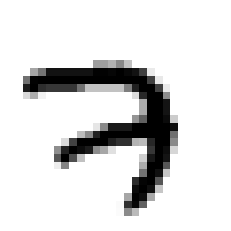

In [102]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

> The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don’t need a `class_names` array:

In [103]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

> The validation set contains 5,000 images, and the test set contains 10,000 images:

In [104]:
X_valid.shape

(5000, 28, 28)

In [105]:
X_test.shape

(10000, 28, 28)

> Let’s take a look at a sample of the images in the dataset:

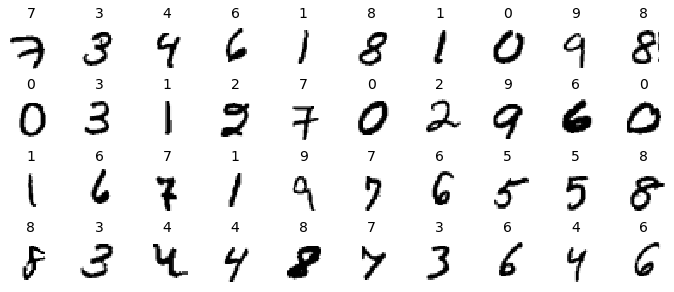

In [106]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

> Let’s build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [107]:
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor: float) -> None:
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch: TensorLike, logs: dict[str, float]) -> None:
        self.rates.append(
            keras.backend.get_value(self.model.optimizer.learning_rate)
        )
        self.losses.append(logs['loss'])
        keras.backend.set_value(
            self.model.optimizer.learning_rate,
            self.model.optimizer.learning_rate * self.factor,
        )

In [108]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [109]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ]
)

> We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [110]:
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'],
)
expon_lr = ExponentialLearningRate(factor=1.005)

> Now let’s train the model for just 1 epoch:

In [111]:
history = model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_data=(X_valid, y_valid),
    callbacks=[expon_lr],
)

1719/1719 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.5843 - val_loss: nan - val_accuracy: 0.0958


> We can now plot the loss as a function of the learning rate:

Text(0, 0.5, 'Loss')

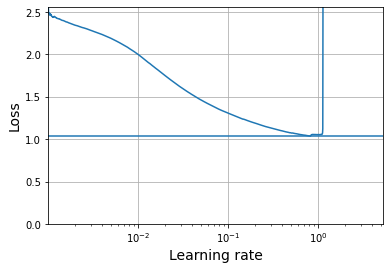

In [112]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel('Learning rate')
plt.ylabel('Loss')

> The loss starts shooting back up violently when the learning rate goes over 6e-1, so let’s try using half of that, at 3e-1:

In [113]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [114]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ]
)

In [115]:
optimizer = keras.optimizers.SGD(learning_rate=3e-1)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'],
)

In [116]:
# Increment this at every run
run_index = 1
run_logdir = Path() / 'my_mnist_logs' / 'run_{:03d}'.format(run_index)
run_logdir

PosixPath('my_mnist_logs/run_001')

In [117]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'my_mnist_model', save_best_only=True
)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb],
)

Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2363 - accuracy: 0.9264 - val_loss: 0.0972 - val_accuracy: 0.9720
Epoch 2/100
1719/1719 [==============================] - 2s 997us/step - loss: 0.0948 - accuracy: 0.9702 - val_loss: 0.1035 - val_accuracy: 0.9706
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0667 - accuracy: 0.9792 - val_loss: 0.0783 - val_accuracy: 0.9770
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0463 - accuracy: 0.9848 - val_loss: 0.0827 - val_accuracy: 0.9766
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0359 - accuracy: 0.9881 - val_loss: 0.0698 - val_accuracy: 0.9826
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.1048 - val_accuracy: 0.9758
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0245 - accuracy: 0.9917 - val_loss: 0.0932 - val_

In [118]:
# Rollback to best model
model = keras.models.load_model('my_mnist_model')
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 908us/step - loss: 0.0708 - accuracy: 0.9799


[0.07079131156206131, 0.9799000024795532]

> We got over 98% accuracy. Finally, let’s look at the learning curves using TensorBoard:

In [119]:
%tensorboard --logdir=./my_mnist_logs